# Task 1 - Prediction using Supervised ML

## By - Anupama Nair

### Goal - Predict the percentage of a student based on the number of study hours.

We will be using Simple Linear Regression.

Dataset link - http://bit.ly/w-data

## Importing Libraries

In [2]:
# We will first import all the relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Exploring the Dataset

In [3]:
# Load the dataset

df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We can see that there are two columns in the dataset - Hours and Scores. Let's check the number of rows.

In [4]:
df.shape  #shape let's you check the dimensions of your dataset.

(25, 2)

There are 25 rows in the dataset.

In [5]:
# Viewing basic statistical details using describe() function

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for Null Values in a dataset is crucial as it can heavily affect the performance of a model.

In [11]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no NaN values present in our dataset.

## Data Visualization

Let us plot our data and check if we can find any relationship manually.

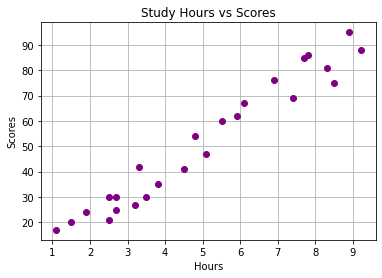

In [21]:
plt.figure()
plt.plot(df['Hours'].values, df['Scores'].values, 'o', color='purple')
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours vs Scores')
plt.show()

By looking at the graph we can infer that our data has a high correlation making it a perfect candidate for implementing linear regression.

## Prediction

Let us divide our dataset into dependent and independent variables. 'y' is our target (or dependent) variable and 'X' is our independent variable.

In [85]:
X = df.iloc[:, :1].values
y = df.iloc[:,-1:].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Setting the random_state is important as it keeps the results constant. Default is set to 'None' and the result varies with each run.

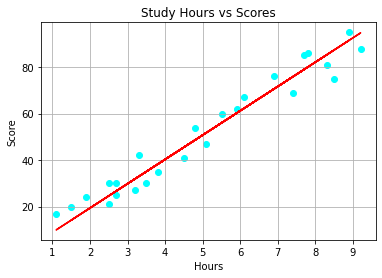

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)   # Training

line = model.coef_*X+model.intercept_  # Equation of line --> y = mx + c

# Plotting the data with the regression line

plt.scatter(X, y, color = 'cyan')
plt.plot(X, line, color = 'red')
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Study Hours vs Scores')
plt.show()

In [95]:
regr_predict = model.predict(X_test)

Predicting the score for 9.25 hours of studying - 

In [96]:
hours =  [[9.25]]
result = model.predict(hours)
print("No. of Hours = {}".format(hours))
print("Score Predicted = {}".format(result[0]))

No. of Hours = [[9.25]]
Score Predicted = [95.22829438]


## Metrics

We shall now evaluate the performance of our model.

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, regr_predict))

Mean Absolute Error: 7.882398086270432
